In [4]:
import numpy as np
from mat4py import loadmat
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import math
from scipy.spatial import distance

In [5]:
data = loadmat('emnist-digits-150.mat')
a = data['dataset']
b = a['DigitImage']
images = b['images']
labels = b['labels']
digits = np.array(images)
bwdigits = digits

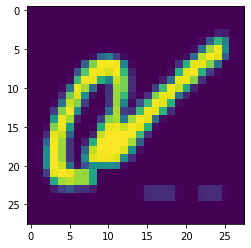

In [14]:
image = digits[39]
image = image.T
fimage = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels)
plt.show()


In [381]:
# extracting features from pca method 
pca=PCA(n_components=150)
pca.fit(digits)
NewDigits=pca.transform(digits)


In [382]:
#implementing Eqivalence relation function 
def Rfunc(X1 , X2 ,q):
    if np.linalg.norm(X1-X2) == 0 :
        return 1
    sigma = 1 / np.linalg.norm(X1-X2)

    a = 0
    for i in range (len(X1)):
        a = a + pow((abs(X1[i]-X2[i])),q)
    a = pow(a,1/q)
    a =(sigma*a)
    a = math.floor(a * 10 ** 3) / 10 ** 3
    R = 1 - a
    R = math.floor(R * 10 ** 3) / 10 ** 3
    return R

In [383]:
table = [[0 for x in range(len(NewDigits))] for y in range(len(NewDigits))] 
for i in range(len(NewDigits)):
    for j in range(len(NewDigits)):
        a = Rfunc(NewDigits[i],NewDigits[j],3)
        table[i][j] = a

In [384]:
table = np.array(table)

In [385]:
trtable = [[0 for x in range(len(NewDigits))] for y in range(len(NewDigits))] 

In [386]:
def RoR(Rtable):
    Rtable= list(Rtable)
    flag=True
    Rprime=Rtable
    temp=Rtable
    while flag:
        Rtable=Rprime
        temp=Rtable
        max1=0
        for k in range(150):
            for i in range(150):
                max=0
                for j in range(150):
                     if min(Rtable[k][i],Rtable[i][j])>max1:
                        max1=min(Rtable[k][j],Rtable[j][i])
                        Rprime[k][j]=max1


        if temp==Rprime:
            flag=False
        return Rprime
    # RP = [[0 for x in range(len(R))] for y in range(len(R))] 
    # temp = []
    # for k in range(len(R)):
    #     for i in range(len(R)):
    #         for j in range(len(R)):
    #             temp.append(max(min(R[k][i] , R[i][j])))
    #         print(temp)    
        
            

In [387]:
TransetiveMatrix = RoR(table)

In [406]:
# plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True
# fig, axs = plt.subplots(1, 1)
# data = TransetiveMatrix

# axs.axis('tight')
# axs.axis('off')
# the_table = axs.table(cellText=data, loc='center')
# plt.show()

In [422]:
def calcAlphacut(cut , table):
    alpha = []
    non = []
    for i in range(len(table)):
        if r[0][i]<cut:
            alpha.append(i)
        else:
            non.append(i)
    
    print('the alpha for',cut,'is = ')
    print(alpha)
    print('the alpha for none is = ')
    print(non)



In [433]:
calcAlphacut(0.32,TransetiveMatrix)

the alpha for 0.32 is = 
[1, 26, 30, 36, 39, 62, 65, 66, 98, 99, 100, 103, 109, 124]
the alpha for none is = 
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 101, 102, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]


In [434]:
calcAlphacut(0.35,TransetiveMatrix)

the alpha for 0.35 is = 
[1, 3, 5, 12, 14, 21, 26, 30, 32, 36, 37, 38, 39, 41, 43, 50, 51, 53, 56, 59, 62, 65, 66, 81, 82, 92, 93, 95, 97, 98, 99, 100, 103, 104, 108, 109, 112, 117, 119, 124, 130, 137, 139]
the alpha for none is = 
[0, 2, 4, 6, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 31, 33, 34, 35, 40, 42, 44, 45, 46, 47, 48, 49, 52, 54, 55, 57, 58, 60, 61, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 83, 84, 85, 86, 87, 88, 89, 90, 91, 94, 96, 101, 102, 105, 106, 107, 110, 111, 113, 114, 115, 116, 118, 120, 121, 122, 123, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]


In [435]:
calcAlphacut(0.38,TransetiveMatrix)

the alpha for 0.38 is = 
[1, 2, 3, 4, 5, 7, 10, 11, 12, 14, 16, 17, 21, 22, 23, 26, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 70, 72, 73, 75, 77, 78, 80, 81, 82, 87, 88, 90, 92, 93, 95, 97, 98, 99, 100, 103, 104, 105, 108, 109, 111, 112, 115, 117, 118, 119, 120, 123, 124, 127, 130, 131, 133, 137, 138, 139, 141, 142, 145]
the alpha for none is = 
[0, 6, 8, 9, 13, 15, 18, 19, 20, 24, 25, 27, 33, 35, 45, 46, 48, 54, 55, 64, 69, 71, 74, 76, 79, 83, 84, 85, 86, 89, 91, 94, 96, 101, 102, 106, 107, 110, 113, 114, 116, 121, 122, 125, 126, 128, 129, 132, 134, 135, 136, 140, 143, 144, 146, 147, 148, 149]


In [436]:
calcAlphacut(0.4,TransetiveMatrix)

the alpha for 0.4 is = 
[1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149]
the alpha for none is = 
[0, 8, 9, 19, 24, 46, 48, 54, 69, 74, 89, 91, 107, 113, 135, 136, 144]


In [437]:
calcAlphacut(0.45,TransetiveMatrix)

the alpha for 0.45 is = 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
the alpha for none is = 
[0]


In [438]:
calcAlphacut(0.48,TransetiveMatrix)

the alpha for 0.48 is = 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
the alpha for none is = 
[0]


In [439]:
calcAlphacut(0.5,TransetiveMatrix)

the alpha for 0.5 is = 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
the alpha for none is = 
[0]


In [440]:
calcAlphacut(0.8,TransetiveMatrix)

the alpha for 0.8 is = 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
the alpha for none is = 
[0]


In [432]:
print('matrix of fuzzy compatibility relation')
print(table)

matrix of fuzzy compatibility relation
[[1.    0.285 0.357 ... 0.394 0.387 0.398]
 [0.285 1.    0.39  ... 0.414 0.355 0.361]
 [0.357 0.39  1.    ... 0.369 0.355 0.322]
 ...
 [0.394 0.414 0.369 ... 1.    0.341 0.357]
 [0.387 0.355 0.355 ... 0.341 1.    0.368]
 [0.398 0.361 0.322 ... 0.357 0.368 1.   ]]


In [431]:
print('table of fuzzy transitive closer ')
TC = np.array(TransetiveMatrix)
print(TC)

table of fuzzy transitive closer 
[[1.    0.285 0.357 ... 0.394 0.387 0.398]
 [0.285 1.    0.39  ... 0.414 0.355 0.361]
 [0.357 0.39  1.    ... 0.369 0.355 0.322]
 ...
 [0.394 0.414 0.369 ... 1.    0.341 0.357]
 [0.387 0.355 0.355 ... 0.341 1.    0.368]
 [0.398 0.361 0.322 ... 0.357 0.368 1.   ]]
